<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/adam-ML-app-section/machine_learning/lesson%204%20-%20ML%20Apps/Gradio/EMNIST_Gradio_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making ML Applications with Gradio

[Gradio](https://www.gradio.app/) is a python library that provides web interfaces for your models. This library is very high-level with it being the easiest to learn for beginners. Here we use a dataset called [EMNIST](https://pytorch.org/vision/stable/datasets.html#emnist) which is an addition to the MNIST(dataset of images with numbers) datasest, by including images of capital and lowercase letters with a total of 62 classes.

Using Gradio, an interface is created at the bottom using the model trained in this notebook to accept our drawings of images or numbers to then predict.

## Importing libraries and Installing Gradio using PIP

Google does not have Gradio automatically installed on their Google Colab machines, so it is necessary to install it to the specific machine you are using right now. If you choose another runtime machine, it is necessary to repeat this step.

**Also, please run this code with a GPU**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing PyTorch
import torch
import torch.nn as nn

# Importing torchvision for dataset
import torchvision
import torchvision.transforms as transforms

# Installing gradio using PIP
!pip install gradio

     |████████████████████████████████| 1.6MB 5.2MB/s 
     |████████████████████████████████| 215kB 22.1MB/s 
     |████████████████████████████████| 1.9MB 22.7MB/s 
     |████████████████████████████████| 962kB 28.0MB/s 
     |████████████████████████████████| 3.2MB 37.5MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=2e68e88b4d90e766446a679a8b3c199673be350c949933099f14b55957e7b658
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=9da4ad5c3f5cf80dbda1d5ddde11d3b0b7388a9fc462dc27b8e4d3eba882ae2c
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


## Downloading and Preparing EMNIST Dataset

**Note:** Even though the images in the EMNIST dataset are 28x28 images just like the regular MNIST dataset, there are necessary transforms needed for EMNIST dataset. If not transformed, the images are rotated 90° counter-clockwise and are flipped vertically. To undo these two issues, we first rotate it 90° counter-clockwise and then flip it horizontally

Here is the image before processing:


Here is the image after processing:


Extracting /content/EMNIST/EMNIST/raw/emnist.zip to /content/EMNIST/EMNIST/raw
Processing byclass


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!
Shape of the training dataset: torch.Size([697932, 28, 28])
Shape of the test dataset: torch.Size([116323, 28, 28])


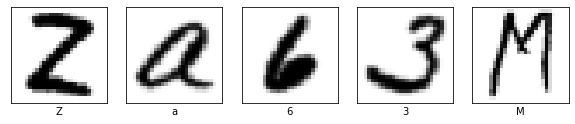

In [2]:
# Getting Dataset
!mkdir EMNIST
root = '/content/EMNIST'

# Creating Transforms
transforms = transforms.Compose([
                        # Rotating image 90 degrees counter-clockwise
                        transforms.RandomRotation((-90,-90)),
                        # Flipping images horizontally
                        transforms.RandomHorizontalFlip(p=1),
                        # Converting images to tensor
                        transforms.ToTensor()
])

# Getting dataset
training_dataset = torchvision.datasets.EMNIST(root,
                                               split='byclass',
                                               train=True,
                                               download=True,
                                               transform=transforms)

test_dataset = torchvision.datasets.EMNIST(root,
                                           split='byclass',
                                           train=False,
                                           download=True,
                                           transform=transforms)

# Loading Dataset into dataloaders
batch_size = 2048
training_dataloader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Getting shapes of dataset
print('Shape of the training dataset:', training_dataset.data.shape)
print('Shape of the test dataset:', test_dataset.data.shape)

# Getting reverted class_to_idx dictionary to get classes by idx
idx_to_class = {val:key for key, val in training_dataset.class_to_idx.items()}

# Plotting 5 images with classes
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_dataset[i][0].squeeze().numpy(), cmap=plt.cm.binary)
    plt.xlabel(idx_to_class[training_dataset[i][1]])

## Building the Model

In [3]:
class Neural_Network(nn.Module):
    # Constructor
    def __init__(self, num_classes):
        super(Neural_Network, self).__init__()

        # Defining Fully-Connected Layers
        self.fc1 = nn.Linear(28*28, 392) # 28*28 since each image is 28*28
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, num_classes)
        
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        
        # Need to flatten each image in the batch
        x = x.flatten(start_dim=1)

        # Input it into the Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)

        return x

# Getting number of classes
num_classes = len(idx_to_class)
model = Neural_Network(num_classes)
print(model)

Neural_Network(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (fc4): Linear(in_features=98, out_features=62, bias=True)
  (relu): ReLU()
)


## Defining Loss Function and Optimizer

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Moving model to GPU

If you have not changed the runtime type to a GPU, please do so now. This helps with the speed of training.

In [5]:
# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Moving model to use GPU
model.to(device)

Neural_Network(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (fc4): Linear(in_features=98, out_features=62, bias=True)
  (relu): ReLU()
)

## Training the Model

In [6]:
# Function that returns a torch tensor with predictions to compare with labels
def get_preds_from_logits(logits):
  # Using softmax to get an array that sums to 1, and then getting the index with the highest value
  return torch.nn.functional.softmax(logits, dim=1).argmax(dim=1)

epochs = 10
train_losses = []
train_accuracies = []
for epoch in range(1, epochs+1):
    train_loss = 0.0

    train_counts = 0

    ###################
    # train the model #
    ###################

    # Setting model to train mode
    model.train()

    for images, labels in training_dataloader:

        # Moving data to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Setting all gradients to zero
        optimizer.zero_grad()

        # Calculate Output
        output = model(images)
            
        # Calculate Loss
        loss = criterion(output, labels)

        # Calculate Gradients
        loss.backward()

        # Perform Gradient Descent Step
        optimizer.step()

        # Saving loss
        train_loss += loss.item()

        # Get Predictions
        train_preds = get_preds_from_logits(output)

        # Saving number of right predictions for accuracy
        train_counts += train_preds.eq(labels).sum().item()

    # Averaging and Saving Losses
    train_loss/=len(training_dataset)
    train_losses.append(train_loss)

    # Getting accuracies and saving them
    train_acc = train_counts/len(training_dataset)
    train_accuracies.append(train_acc)


    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.2f}%'.format(epoch, train_loss, train_acc*100))

Epoch: 1 	Training Loss: 0.000590 	Training Accuracy: 67.11%
Epoch: 2 	Training Loss: 0.000302 	Training Accuracy: 80.17%
Epoch: 3 	Training Loss: 0.000259 	Training Accuracy: 82.35%
Epoch: 4 	Training Loss: 0.000238 	Training Accuracy: 83.43%
Epoch: 5 	Training Loss: 0.000225 	Training Accuracy: 84.08%
Epoch: 6 	Training Loss: 0.000216 	Training Accuracy: 84.53%
Epoch: 7 	Training Loss: 0.000209 	Training Accuracy: 84.88%
Epoch: 8 	Training Loss: 0.000203 	Training Accuracy: 85.17%
Epoch: 9 	Training Loss: 0.000198 	Training Accuracy: 85.46%
Epoch: 10 	Training Loss: 0.000194 	Training Accuracy: 85.71%


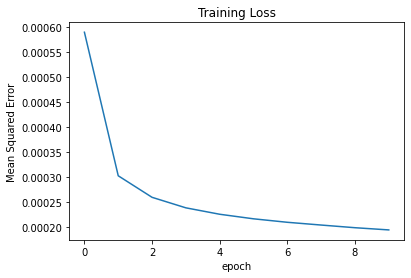

In [7]:
plt.plot(train_losses)
plt.xlabel('epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss')
plt.show()

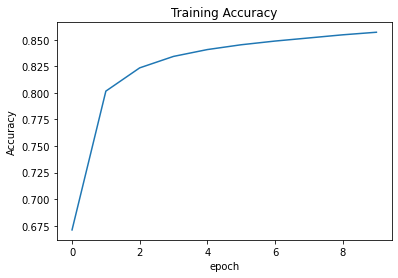

In [8]:
plt.plot(train_accuracies)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

## Evaluating the model

Here we will display the test loss and accuracy and examples of images that were misclassified.

In [9]:
test_loss = 0.0
test_counts = 0

# Setting model to evaluation mode, no parameters will change
model.eval()

for images, labels in test_dataloader:

    # Moving to GPU if available
    images, labels = images.to(device), labels.to(device)

    # Calculate Output
    output = model(images)

    # Calculate Loss
    loss = criterion(output, labels)

    # Saving loss
    test_loss += loss.item()

    # Get Predictions
    test_preds = get_preds_from_logits(output)

    # Saving number of right predictions for accuracy
    test_counts += test_preds.eq(labels).sum().item()

# Calculating test accuracy
test_acc = test_counts/len(test_dataset)
print('Test Loss: {:.6f} \tTest Accuracy: {:.2f}%'.format(test_loss, test_acc*100))

Test Loss: 24.000878 	Test Accuracy: 84.97%


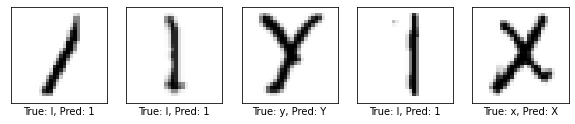

In [10]:
import torchvision.transforms as transforms

# Have to another set of transforms to rotate and flip testing data
test_transforms = transforms.Compose([
                        # Rotating image 90 degrees counter-clockwise
                        transforms.RandomRotation((-90,-90)),
                        # Flipping images horizontally
                        transforms.RandomHorizontalFlip(p=1)
])

# Transforming the data and normalizing them
test_images = test_transforms(test_dataset.data).to(device)/255
# Getting Predictions
predictions = get_preds_from_logits(model(test_images))
# Getting Labels
test_labels = test_dataset.targets.to(device)

# Getting misclassified booleans
correct_bools = test_labels.eq(predictions)
misclassified_indices = []
for i in range(len(correct_bools)):
    if correct_bools[i] == False:
        misclassified_indices.append(i)

# Plotting 5 misclassified images
plt.figure(figsize=(10,2))
for i in range(5):
    idx = misclassified_indices[i]
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx].squeeze().cpu().numpy(), cmap=plt.cm.binary)
    true_label = idx_to_class[test_labels[idx].item()]
    pred_label = idx_to_class[predictions[idx].item()]
    plt.xlabel(f'True: {true_label}, Pred: {pred_label}')

# How to use Gradio

There are three parts of using Gradio
1. Define a function that takes input and returns your model's output
2. Define what type of input the interface will use
3. Define what type of output the interface will give

The function `recognize_image` takes a 28x28 image that is not yet normalized and returns a dictionary with the keys being the classes and the values being the probabilities for that class.

The class [`gradio.inputs.Image`](https://www.gradio.app/docs#i_image) is used as the input that provides a window in the Gradio interface, but there are many customizations you can provide.

These are some the parameters:
1. shape - (width, height) shape to crop and resize image to; if None, matches input image size.
2. image_mode - "RGB" if color, or "L" if black and white.
3. invert_colors - whether to invert the image as a preprocessing step.
4. source - Source of image. "upload" creates a box where user can drop an image file, "webcam" allows user to take snapshot from their webcam, "canvas" defaults to a white image that can be edited and drawn upon with tools.

The class [gradio.outputs.Label](https://www.gradio.app/docs#o_label) is used as the output, which provides probabilities to the interface for the purpose of displaying them.

These are the parameters:
1. num_top_classes - number of most confident classes to show.
2. type - Type of value to be passed to component. "value" expects a single out label, "confidences" expects a dictionary mapping labels to confidence scores, "auto" detects return type.
3. label - component name in interface.

The interface class [gradio.Interface](https://www.gradio.app/docs#interface) is responsible of creating the interface that compiles the type of inputs and outputs. There is a `.launch()` method that launches the interface in this notebook after compiling.

These are the parameters used in this interface:
1. fn - the function to wrap an interface around.
2. inputs - a single Gradio input component, or list of Gradio input components. Components can either be passed as instantiated objects, or referred to by their string shortcuts. The number of input components should match the number of parameters in fn.
3. outputs - a single Gradio output component, or list of Gradio output components. Components can either be passed as instantiated objects, or referred to by their string shortcuts. The number of output components should match the number of values returned by fn.
4. title - a title for the interface; if provided, appears above the input and output components.
5. description - a description for the interface; if provided, appears above the input and output components.
6. live - whether the interface should automatically reload on change.
7. interpretation - function that provides interpretation explaining prediction output. Pass "default" to use built-in interpreter.

I will enourage you to view the [documentation](https://www.gradio.app/docs) for the interface, inputs and outputs, you can find all the information you need there. It is helpful to refer to the documentation to understand other parameters that are not used in this lesson.

In [18]:
import gradio
import gradio as gr

# Function that returns a torch tensor with predictions to compare with labels
def get_probs_from_logits(logits):
  # Using softmax to get probabilities from the logits
  return torch.nn.functional.softmax(logits, dim=1)

# Function that takes the img drawn in the Gradio interface, then gives probabilities
def recognize_image(img):
    # Normalizes inputted image and converts it to a tensor for the model
    img = torch.tensor(img/255, dtype=torch.float).unsqueeze(dim=0).to(device)

    # Getting output
    output = model(img)
    
    # Getting probabilites of the image
    probabilities = get_probs_from_logits(output).flatten()

    # Returns a dictionary with the key being the class and val being the probability
    probabilities_dict = {idx_to_class[i]:probabilities[i].item() for i in range(num_classes)}

    return probabilities_dict

im = gradio.inputs.Image(shape=(28, 28),
                         image_mode='L',
                         invert_colors=True,
                         source="canvas")

title = "Number and Letter Classifier App"
description = """This app is able to guess the number or letter you draw below.
                 The ML model was trained on the EMNIST dataset, please use below!"""

iface = gr.Interface(fn=recognize_image,
                     inputs=im,
                     outputs=gradio.outputs.Label(num_top_classes=5),
                     title=title,
                     description=description,
                     live=True,
                     interpretation="default")

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://27407.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7864/',
 'https://27407.gradio.app')

# What's next?

The next challenge will cover pretrained models, which are models that are already trained for us and gives us the availability of using the model to make predictions automatically. You will create another Gradio app that uses pretrained models to classify images.